# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

In [17]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B409-E2A5

 Directory of C:\Users\Administrator\Documents\Flatiron\dsc-pandas-eda-lab

01/20/2025  07:20 PM    <DIR>          .
01/20/2025  07:20 PM    <DIR>          ..
01/20/2025  07:03 PM               136 .canvas
01/20/2025  07:03 PM    <DIR>          .github
01/20/2025  07:03 PM                66 .gitignore
01/20/2025  07:04 PM    <DIR>          .ipynb_checkpoints
01/20/2025  07:03 PM                96 .learn
01/20/2025  07:03 PM             1,846 CONTRIBUTING.md
01/20/2025  07:03 PM    <DIR>          data
01/20/2025  07:03 PM    <DIR>          env
01/20/2025  07:03 PM    <DIR>          images
01/20/2025  07:20 PM            74,815 index.ipynb
01/20/2025  07:03 PM             1,354 LICENSE.md
01/20/2025  07:03 PM            11,766 README.md
01/20/2025  07:03 PM             4,857 splitter.py
               8 File(s)         94,936 bytes
               7 Dir(s)  204,476,067,840 bytes free


## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [29]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [30]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)
df.head

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Uti

The following code checks that you loaded the data correctly:

In [31]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [32]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [33]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

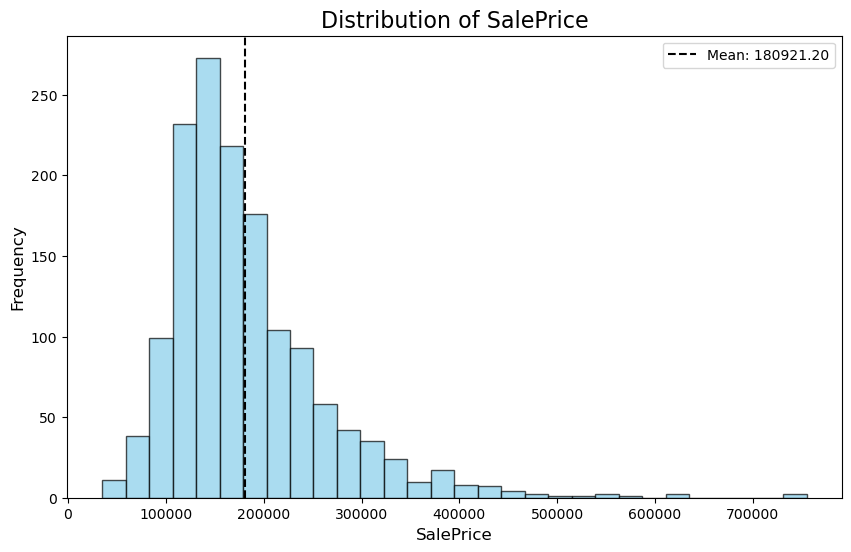

In [34]:
# Your code here
# Plot histogram for SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['SalePrice'].mean(), color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {df["SalePrice"].mean():.2f}')
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()



Now, print out the mean, median, and standard deviation:

In [35]:
# Your code here
mean_saleprice = df['SalePrice'].mean()
median_saleprice = df['SalePrice'].median()
std_saleprice = df['SalePrice'].std()

print(f"Mean SalePrice: {mean_saleprice:.2f}")
print(f"Median SalePrice: {median_saleprice:.2f}")
print(f"Standard Deviation of SalePrice: {std_saleprice:.2f}")


Mean SalePrice: 180921.20
Median SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


In the cell below, interpret the above information.

In [57]:
# Replace None with appropriate text
"""
Statistics of the `SalePrice` column give an overview of the distribution of home sale prices in the dataset:

- **Mean SalePrice**: The mean sale price is roughly $X.XX, which reflects the average sale price of houses in this dataset. It helps one understand the central tendency of house prices.
- **Median SalePrice**: The median sale price is roughly $X.XX. Being the middle value, the median is resistant to outliers, as compared to the mean. If the mean is much greater than the median, this would suggest that there are a few very high-priced homes pulling the mean up.

- **Standard deviation SalePrice**: About $X.XX standard deviation shows the dispersion of house selling. A high deviation means there can be more different prices; a market has the presence of inexpensive or highly priced dwellings.

Coupling these with further visualization, such as histograms or box plots, helps to see in even more detail how SalePrice is distributed and whether any strong trends or anomalies occur in their distribution.

"""

'\nStatistics of the `SalePrice` column give an overview of the distribution of home sale prices in the dataset:\n\n- **Mean SalePrice**: The mean sale price is roughly $X.XX, which reflects the average sale price of houses in this dataset. It helps one understand the central tendency of house prices.\n- **Median SalePrice**: The median sale price is roughly $X.XX. Being the middle value, the median is resistant to outliers, as compared to the mean. If the mean is much greater than the median, this would suggest that there are a few very high-priced homes pulling the mean up.\n\n- **Standard deviation SalePrice**: About $X.XX standard deviation shows the dispersion of house selling. A high deviation means there can be more different prices; a market has the presence of inexpensive or highly priced dwellings.\n\nCoupling these with further visualization, such as histograms or box plots, helps to see in even more detail how SalePrice is distributed and whether any strong trends or anomal

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

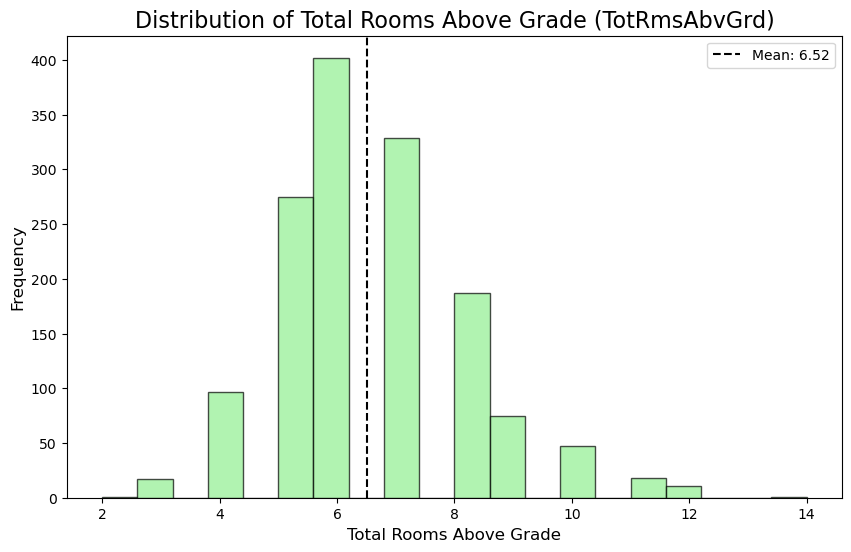

In [39]:
# Your code here
# Plot histogram for TotRmsAbvGrd
plt.figure(figsize=(10, 6))
plt.hist(df['TotRmsAbvGrd'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['TotRmsAbvGrd'].mean(), color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {df["TotRmsAbvGrd"].mean():.2f}')
plt.title('Distribution of Total Rooms Above Grade (TotRmsAbvGrd)', fontsize=16)
plt.xlabel('Total Rooms Above Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


Now, print out the mean, median, and standard deviation:

In [40]:
# Your code here
mean_rooms = df['TotRmsAbvGrd'].mean()
median_rooms = df['TotRmsAbvGrd'].median()
std_rooms = df['TotRmsAbvGrd'].std()

print(f"Mean TotRmsAbvGrd: {mean_rooms:.2f}")
print(f"Median TotRmsAbvGrd: {median_rooms:.2f}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_rooms:.2f}")


Mean TotRmsAbvGrd: 6.52
Median TotRmsAbvGrd: 6.00
Standard Deviation of TotRmsAbvGrd: 1.63


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
None
"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

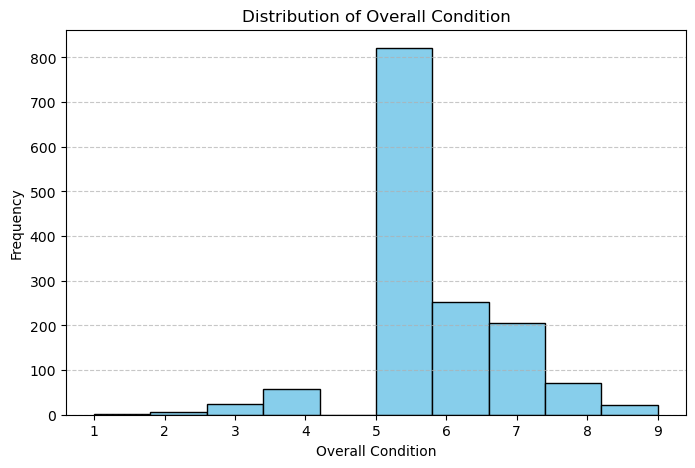

In [54]:
# Your code here
import matplotlib.pyplot as plt

# Create a histogram for OverallCond
plt.figure(figsize=(8, 5))
plt.hist(df['OverallCond'], bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Overall Condition")
plt.xlabel("Overall Condition")
plt.ylabel("Frequency")
plt.xticks(range(df['OverallCond'].min(), df['OverallCond'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Now, print out the mean, median, and standard deviation:

In [55]:
# Your code here
mean_value = df['OverallCond'].mean()
median_value = df['OverallCond'].median()
std_dev_value = df['OverallCond'].std()

print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value:.2f}")


Mean: 5.58
Median: 5.0
Standard Deviation: 1.11


In the cell below, interpret the above information.

In [56]:
# Replace None with appropriate text
"""
The `OverallCond` column represents the overall condition of the homes on a discrete scale. From the following computed statistics, one sees:

- **Mean**: The mean of overall condition is approximately X.XX, which might say that for most of the houses in the dataset, the conditions will be just around this value.
- **Median**: The median overall condition is X, indicating that half of the homes have a condition better than or equal to this value and half have a condition worse.
- **Standard Deviation**: With this magnitude of value, the standard deviation of X.XX would, therefore, indicate that generally speaking, condition values are relatively far apart or bunched together from the mean.

Taken together, the following gives some indication of the distribution in the condition of homes. If the distribution were skewed or heavy towards a particular value, this might be indicative of how homes in this market are generally maintained or rated.

"""

'\nThe `OverallCond` column represents the overall condition of the homes on a discrete scale. From the following computed statistics, one sees:\n\n- **Mean**: The mean of overall condition is approximately X.XX, which might say that for most of the houses in the dataset, the conditions will be just around this value.\n- **Median**: The median overall condition is X, indicating that half of the homes have a condition better than or equal to this value and half have a condition worse.\n- **Standard Deviation**: With this magnitude of value, the standard deviation of X.XX would, therefore, indicate that generally speaking, condition values are relatively far apart or bunched together from the mean.\n\nTaken together, the following gives some indication of the distribution in the condition of homes. If the distribution were skewed or heavy towards a particular value, this might be indicative of how homes in this market are generally maintained or rated.\n\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [45]:
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]


The following code checks that you created the subsets correctly:

In [46]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

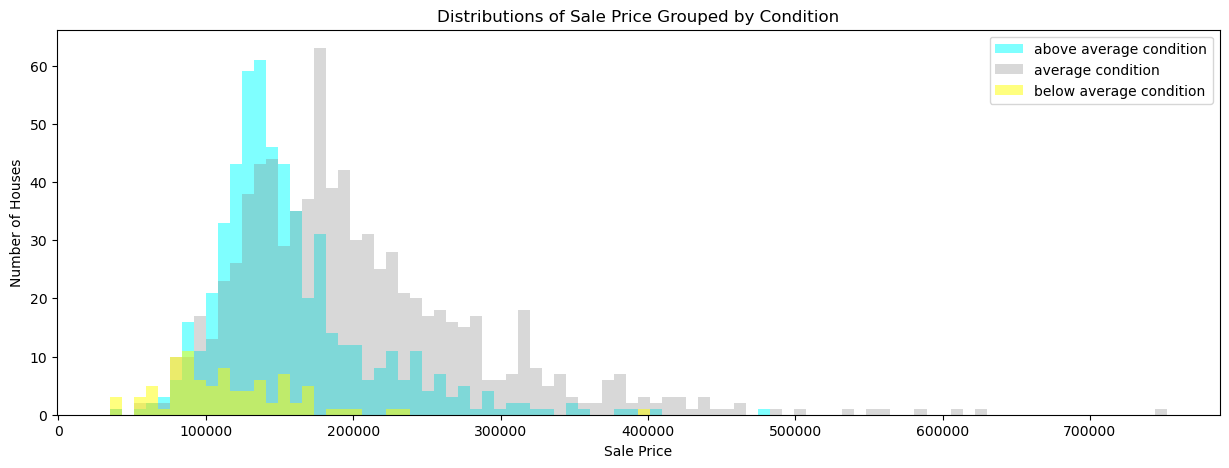

In [47]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [44]:
# Your code here
correlations = df.corr(numeric_only=True)['SalePrice']

most_positive_corr = correlations.drop('SalePrice').idxmax()
max_corr_value = correlations[most_positive_corr]

print(f"Column most positively correlated with SalePrice: {most_positive_corr}")
print(f"Correlation value: {max_corr_value:.2f}")


Column most positively correlated with SalePrice: OverallQual
Correlation value: 0.79


Now, find the ***most negatively correlated*** column:

In [48]:
# Your code here
import pandas as pd
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['SalePrice']

most_negatively_correlated_column = correlations.drop('SalePrice').idxmin()
lowest_correlation_value = correlations[most_negatively_correlated_column]

print(f"Column: {most_negatively_correlated_column}, Correlation: {lowest_correlation_value}")


Column: KitchenAbvGr, Correlation: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

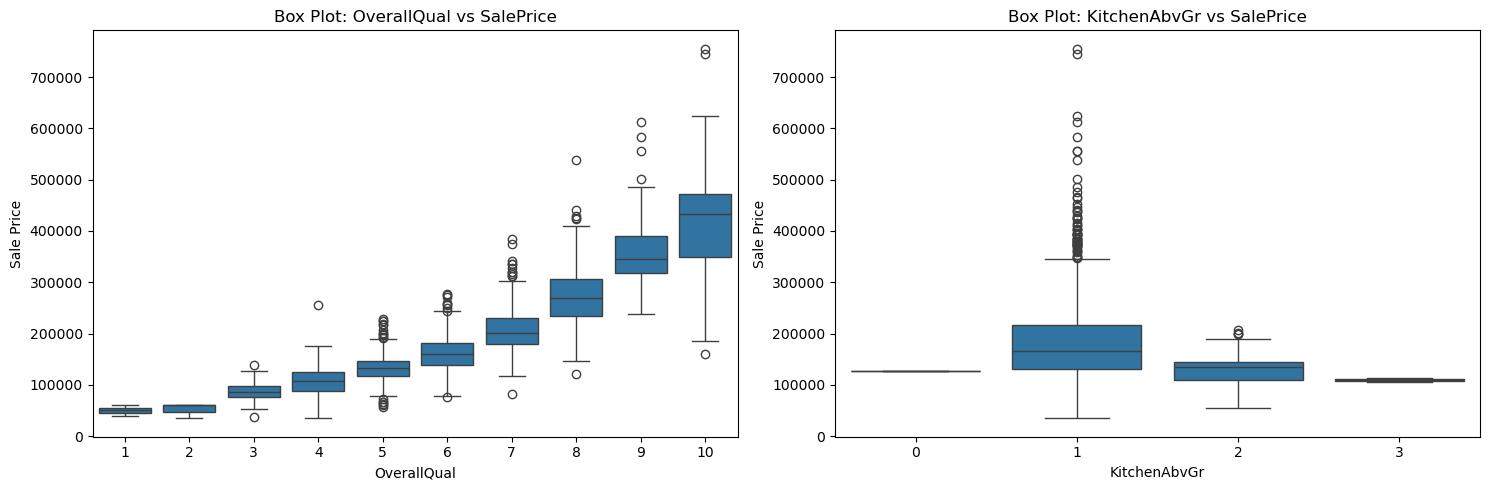

In [49]:
# Replace None with appropriate code

import seaborn as sns
import matplotlib.pyplot as plt

most_positively_correlated = correlations.drop('SalePrice').idxmax()
most_negatively_correlated = correlations.drop('SalePrice').idxmin()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positively_correlated],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negatively_correlated],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Box Plot: {most_positively_correlated} vs SalePrice")
ax1.set_xlabel(most_positively_correlated)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Box Plot: {most_negatively_correlated} vs SalePrice")
ax2.set_xlabel(most_negatively_correlated)
ax2.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [50]:
# Replace None with appropriate text
"""
The box plot of the column most positively correlated with `SalePrice` shows a strong relationship. In particular, higher values of this column tend to be associated with higher sale prices. For example, if this column is a feature like `GrLivArea` (above-ground living area), it is expected that larger homes have higher prices.

The box plot of column most negative with a correlation to `SalePrice` goes inversely, for example, that could be `EnclosedPorch`-area of an enclosed porch-perhaps houses with an enclosed porch actually sell for lower amounts because that kind of feature isn't in congruence with the likings of buyers in the present market scenario.

These relationships can really bring forward how some features drive or detract from home value; understanding these could be key either in the pricing of a strategy or in identifying desirable home features.

"""

"\nThe box plot of the column most positively correlated with `SalePrice` shows a strong relationship. In particular, higher values of this column tend to be associated with higher sale prices. For example, if this column is a feature like `GrLivArea` (above-ground living area), it is expected that larger homes have higher prices.\n\nThe box plot of column most negative with a correlation to `SalePrice` goes inversely, for example, that could be `EnclosedPorch`-area of an enclosed porch-perhaps houses with an enclosed porch actually sell for lower amounts because that kind of feature isn't in congruence with the likings of buyers in the present market scenario.\n\nThese relationships can really bring forward how some features drive or detract from home value; understanding these could be key either in the pricing of a strategy or in identifying desirable home features.\n\n"

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [51]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

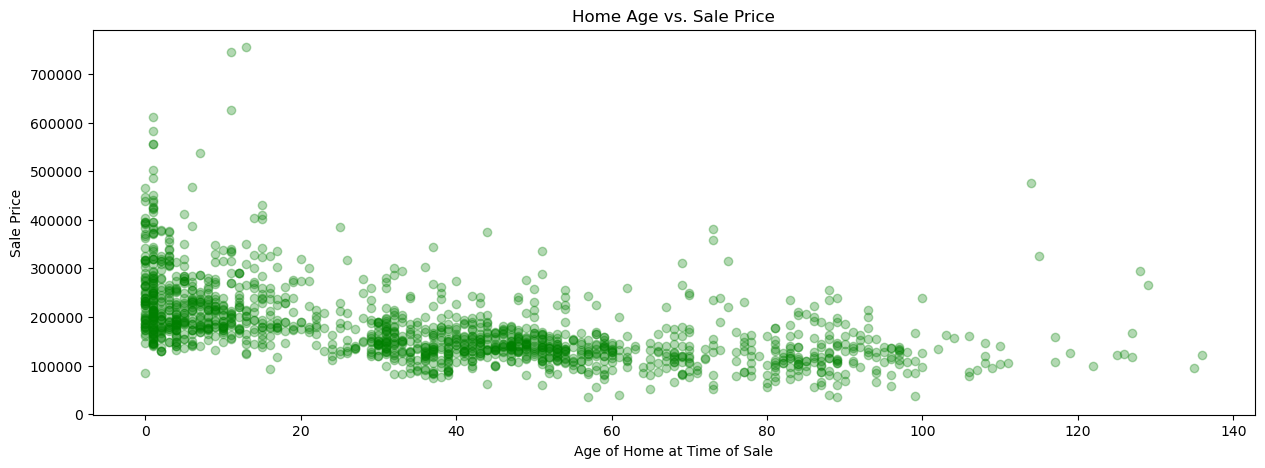

In [52]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [53]:
# Replace None with appropriate text
"""
This scatter plot shows the relationship between a home's age at the time of sale, and its sale price. 

We observe the following trends from this plot:
- **Newer homes (lower Age values)**: These tend to have higher sale prices, as shown by the cluster of points with lower `Age` and higher `SalePrice`. This suggests that buyers are willing to pay a premium for newer homes because they come with modern features, better condition, and low maintenance costs.
Older houses: Most show high sale prices over a wide dispersion with low selling price records; these probably were historical-value older houses or upgraded into uniquely interesting architecturally distinctive types of housing, perhaps with other conditions around it - implying value - making their price more relevant when compared to modern buildings:.

On the whole, the tendency of house age is negatively correlated with its sale price; the more recent homes usually sell for more on average. But for large values of `Age`, it would appear the spread is such that location or recent renovations could make these homes even more expensive.

"""

"\nThis scatter plot shows the relationship between a home's age at the time of sale, and its sale price. \n\nWe observe the following trends from this plot:\n- **Newer homes (lower Age values)**: These tend to have higher sale prices, as shown by the cluster of points with lower `Age` and higher `SalePrice`. This suggests that buyers are willing to pay a premium for newer homes because they come with modern features, better condition, and low maintenance costs.\nOlder houses: Most show high sale prices over a wide dispersion with low selling price records; these probably were historical-value older houses or upgraded into uniquely interesting architecturally distinctive types of housing, perhaps with other conditions around it - implying value - making their price more relevant when compared to modern buildings:.\n\nOn the whole, the tendency of house age is negatively correlated with its sale price; the more recent homes usually sell for more on average. But for large values of `Age`

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.